In [1]:
from addit.ncf import conti
import jax.numpy as jnp
import numpy as np
from jax.lax import scan
from jax import jit, vmap
from addit.ncf import inc3D

In [2]:
N=10000
Ngx=1024
xv=jnp.linspace(0,1,Ngx) #nu grid
yv=jnp.linspace(0,1,11) #grid
zv=jnp.linspace(0,1,11) #grid
x=np.random.rand(N)
y=np.random.rand(N)
z=np.random.rand(N)

In [7]:
val=inc3D(x,y,z,xv,yv,zv)
valbuf=jnp.vstack([val,jnp.zeros_like(val)])
print(jnp.shape(val),jnp.shape(valbuf))

(1024, 11, 11) (2048, 11, 11)


In [15]:
dx = (x[0]-x[-1])/(Ngx-1)
k = jnp.fft.rfftfreq(2*Ngx,dx)

In [16]:
dx

0.00028945094390787755

In [17]:
fftval = jnp.fft.rfft(valbuf,axis=0)

In [18]:
valf=jnp.sum(fftval,axis=(1,2))

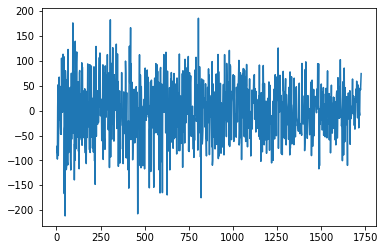

In [20]:
import matplotlib.pyplot as plt
plt.plot(k[1:],valf[1:])
plt.show()